# Отчёт по лабораторной работе №1 "Логистическая регрессия в качестве нейронной сети"

### 1. Загрузите данные и отобразите на экране несколько из изображений с помощью языка Python;

In [1]:
import os
from scipy.io import loadmat


DATA_DIRECTORY = f'Datasets/'


def load_data_from_mat_file(filename):
    filepath = f'{DATA_DIRECTORY}{filename}.mat'
    return loadmat(filepath)

dataset = load_data_from_mat_file('1/notMNIST_large')

In [2]:
X = dataset['images']
Y = dataset['labels'][0]

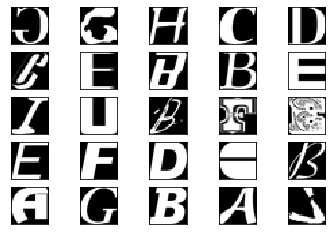

In [14]:
import numpy as np
import matplotlib.pyplot as plt

X_rand = X[np.random.choice(X.shape[0], 25, replace=False), :]
fig, axs = plt.subplots(5, 5)
axs = axs.flatten()

for i in range(X_rand.shape[0]):
    image = X_rand[i, :, :]
    axs[i].imshow(image, cmap='gray')
    axs[i].xaxis.set_visible(False)
    axs[i].yaxis.set_visible(False)

plt.show()

### 2. Проверьте, что классы являются сбалансированными, т.е. количество изображений, принадлежащих каждому из классов, примерно одинаково (В данной задаче 10 классов).

In [4]:
from collections import Counter

label_counts = Counter(Y)
print(label_counts)

Counter({7.0: 52912, 5.0: 52912, 4.0: 52912, 8.0: 52912, 2.0: 52912, 6.0: 52912, 3.0: 52911, 9.0: 52911, 1.0: 52910, 0.0: 52909})


Максимальная разница между классами равно 3 изображениям. По сравнению со количеством изображений в одном классе это мелочи. Следовательно, классы сбалансированы.

### 3. Разделите данные на три подвыборки: обучающую (200 тыс. изображений), валидационную (10 тыс. изображений) и контрольную (тестовую) (19 тыс. изображений);


In [5]:
start = 0
unique_keys = []
for i, count in enumerate(label_counts.values()):
    unique_keys.append(len(Counter(Y[start:start + count]).keys()) == 1)
    start += count

print(unique_keys)

[True, True, True, True, True, True, True, True, True, True]


Следовательно, наш датасет отсортирован

In [6]:
labels_dict = {}
start = 0
for key, count in label_counts.items():
    labels_dict[key] = range(start, start + count)
    start += count

print(labels_dict)

{7.0: range(0, 52912), 5.0: range(52912, 105824), 4.0: range(105824, 158736), 8.0: range(158736, 211648), 3.0: range(211648, 264559), 1.0: range(264559, 317469), 0.0: range(317469, 370378), 9.0: range(370378, 423289), 2.0: range(423289, 476201), 6.0: range(476201, 529113)}


In [7]:
def create_dataset(length):
    temp_dataset = None
    count = int(length / len(labels_dict.keys()))
    for key, value in labels_dict.items():
        if temp_dataset is not None:
            temp_dataset = np.concatenate([temp_dataset, np.random.choice(value, count, replace=False)])
        else:
            temp_dataset = np.random.choice(value, count, replace=False)

    return temp_dataset

training_dataset = create_dataset(200000)
validation_dataset = create_dataset(10000)
test_dataset = create_dataset(19000)

### 4. Проверьте, что данные из обучающей выборки не пересекаются с данными из валидационной и контрольной выборок. Другими словами, избавьтесь от дубликатов в обучающей выборке.


In [8]:
training_dataset = np.array(list(set(training_dataset) - set(test_dataset) - set(validation_dataset)))


print('training_dataset_counter:', Counter(Y[training_dataset.tolist()]))

training_dataset_counter: Counter({8.0: 18942, 7.0: 18932, 1.0: 18923, 6.0: 18920, 0.0: 18918, 4.0: 18916, 9.0: 18910, 3.0: 18909, 2.0: 18907, 5.0: 18893})


### 5. Постройте простейший классификатор (например, с помощью логистической регрессии). Постройте график зависимости точности классификатора от размера обучающей выборки (50, 100, 1000, 50000). Для построения классификатора можете использовать библиотеку SkLearn (http://scikit-learn.org).

In [9]:
image_dataset = X.reshape((529113, 28*28))

In [10]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(1000,), random_state=1, activation='logistic', solver='sgd', early_stopping=True)

In [11]:
def get_score(dataset_len):
    temp_dataset = np.random.choice(training_dataset, dataset_len, replace=False)
    clf.fit(image_dataset[temp_dataset, :], Y[temp_dataset])
    return clf.score(image_dataset[training_dataset, :], Y[training_dataset])

In [16]:
datasets_lens = [50, 100, 1000, 50000]
datasets_scores = [get_score(length) for length in datasets_lens]
print(datasets_scores)

[0.16053285404662473, 0.36887984352698633, 0.7757466828778348, 0.8751176190727916]


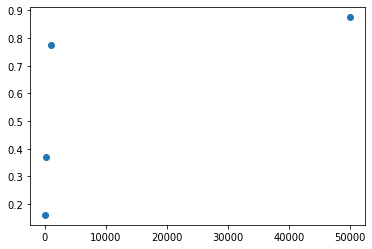

In [17]:
import matplotlib.pyplot as plt

plt.plot(datasets_lens, datasets_scores, 'o')